Objectives 

I am part of an AI Engineering team in AI Singapore (AISG) that builds AI solutions to solve problem statements from the public and private sectors. My current client is U.A Secondary School, a public educational institute in Singapore. U.A Secondary School wants AISG to build a model that can predict the students’ O-level mathematics examination scores to identify weaker students prior to the examination timely. Additional support can then be rendered to the students to ensure they are more prepared for the upcoming test. I am given access to U.A Secondary School's past students’ performance dataset (a link to retrieve the dataset can be found in the Data section below). With the given dataset, the first of the following two tasks will be performed here: 1. Exploratory Data Analysis 2. Build an End-to-end Machine Learning Pipeline. The second task of designing and creating a machine learning pipeline in Python scripts (`.py` files) will not be available here but available in a separate python file.

Task 1 - Exploratory Data Analysis (EDA) Using the given dataset, which can be found in the Data section below, conduct an EDA and create an interactive notebook in Python that can be used as a presentation to explain the findings of my analysis. I will be employing appropriate visualizations and statistical techniques to derive meaningful and relevant insights from the dataset. Deliverables 1. Notebook in Python: An `.ipynb` file named `eda.ipynb`. 2. My EDA would: ○ Outline the steps taken in the EDA process ○ Explain the purpose of each step ○ Explain the conclusions drawn from each step ○ Explain the interpretation of the various statistics generated and how they impact my analysis ○ Generate clear, meaningful, and understandable visualizations that support my findings ○ Organize the notebook so that is it clear and easy to understand.

To import the necessary libraries and packages to execute codes, 'sgqalchemy' and its package "create_engine", pandas and seaborn as well as matplotlib are imported. Import Scipy to check for skewness as well as numpy for calculations.

Data from file 'score' is read using read_sql, from the database engine that has been created using create_engine from sqlalchemy. First/last 5 rows of data is and can be visible and displayed using student.head/ student.tail. The result is the displaying of column names and their corresponding rows of data in Data Exploration 1. Quick overview of the dataset with statistics generated with details such as count, unique, top, frequencies, measures of central tendencies and dispersions, quartiles, as well as minimum and maximum is possible with student.describe() executed in Data Exploration 2. In Data Exploration 3, I would have noted the three different data types(int64, object,float64) by executing student.dtypes(). Column names are then derived in Data Exploration 4.  Discreet continuous variables can be visually checked through using Seaborn's .hist() in Data Exploration 5. A random check on a column to confirm there are indeed outliers(presented as points outside the whiskers) present in particular pair "age' and "attendance_rate" in Data Exploration 6 through the use of boxplot. in Data Exploration 7, Seaborn's pairplot is graphically see the relationships of pairs between the features columns. Student.shape() and student.count() in Data Exploration 8 and 9 will notify the number of data in rows, hinting missing data. In Data Exploration 10, duplicates function is called to check for duplication of data resulting in 19 rows of duplicate data. Implementing Data Exploration 11 will yield the total number of records, total number students obtaining final test results of up to 50.00, as well as more than 50.00 and also the percentage of Percentage of individuals obtaining less than 50.00.
 

In [2]:
# Import the engine from the SQLAlchemy
import sqlalchemy
from sqlalchemy import create_engine

# Import pandas, seaborn, matplotlib.pyplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

# Import scipy
from scipy.stats import skew

# Import numpy
import numpy as np

# Create the connection to the engine from the sqlite file
dbEngine=sqlalchemy.create_engine('sqlite:///C:/data/score.db')



# Import supplementary visualization code visuals.py
#import visuals as vs

In [3]:
# Implementation: Data Exploration 1
# Read data with pandas and visually verify using either .head() or .tail() method

student = pd.read_sql('select * from score',dbEngine)
student.head()
#student.tail()

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow


In [4]:
# Implementation: Data Exploration 2
student.describe(include="all")

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
count,15900.000000,15900.000000,15900,15900,15900,15900,15900,15900,15405.000000,15900.000000,15900.000000,15900.000000,15900.000000,15122.000000,15900,15900,15900,15900
unique,NaN,NaN,2,8,2,15000,2,4,NaN,NaN,NaN,NaN,NaN,NaN,13,5,3,6
top,NaN,NaN,No,Clubs,Auditory,GD80JW,Male,Yes,NaN,NaN,NaN,NaN,NaN,NaN,23:00,5:00,public transport,yellow
freq,NaN,NaN,11195,3912,9132,2,7984,8669,NaN,NaN,NaN,NaN,NaN,NaN,3131,3246,6371,2731
mean,7949.500000,0.886541,NaN,NaN,NaN,NaN,NaN,NaN,67.165401,13.880000,8.906038,15.213459,10.312579,93.270268,NaN,NaN,NaN,NaN
std,4590.078975,0.751346,NaN,NaN,NaN,NaN,NaN,NaN,13.977879,6.552584,6.663852,1.758941,4.461861,7.984230,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,0.000000,0.000000,-5.000000,0.000000,40.000000,NaN,NaN,NaN,NaN
25%,3974.750000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000,NaN,NaN,NaN,NaN
50%,7949.500000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,14.000000,8.000000,15.000000,9.000000,95.000000,NaN,NaN,NaN,NaN
75%,11924.250000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000,NaN,NaN,NaN,NaN


In [5]:
# Implementation: Data Exploration 3
student.dtypes

index                   int64
number_of_siblings      int64
direct_admission       object
CCA                    object
learning_style         object
student_id             object
gender                 object
tuition                object
final_test            float64
n_male                float64
n_female              float64
age                   float64
hours_per_week        float64
attendance_rate       float64
sleep_time             object
wake_time              object
mode_of_transport      object
bag_color              object
dtype: object

In [6]:
# Implementation: Data Exploration 4
student.columns

Index(['index', 'number_of_siblings', 'direct_admission', 'CCA',
       'learning_style', 'student_id', 'gender', 'tuition', 'final_test',
       'n_male', 'n_female', 'age', 'hours_per_week', 'attendance_rate',
       'sleep_time', 'wake_time', 'mode_of_transport', 'bag_color'],
      dtype='object')

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'number_of_siblings'}>,
        <AxesSubplot:title={'center':'final_test'}>],
       [<AxesSubplot:title={'center':'n_male'}>,
        <AxesSubplot:title={'center':'n_female'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'hours_per_week'}>,
        <AxesSubplot:title={'center':'attendance_rate'}>, <AxesSubplot:>]],
      dtype=object)

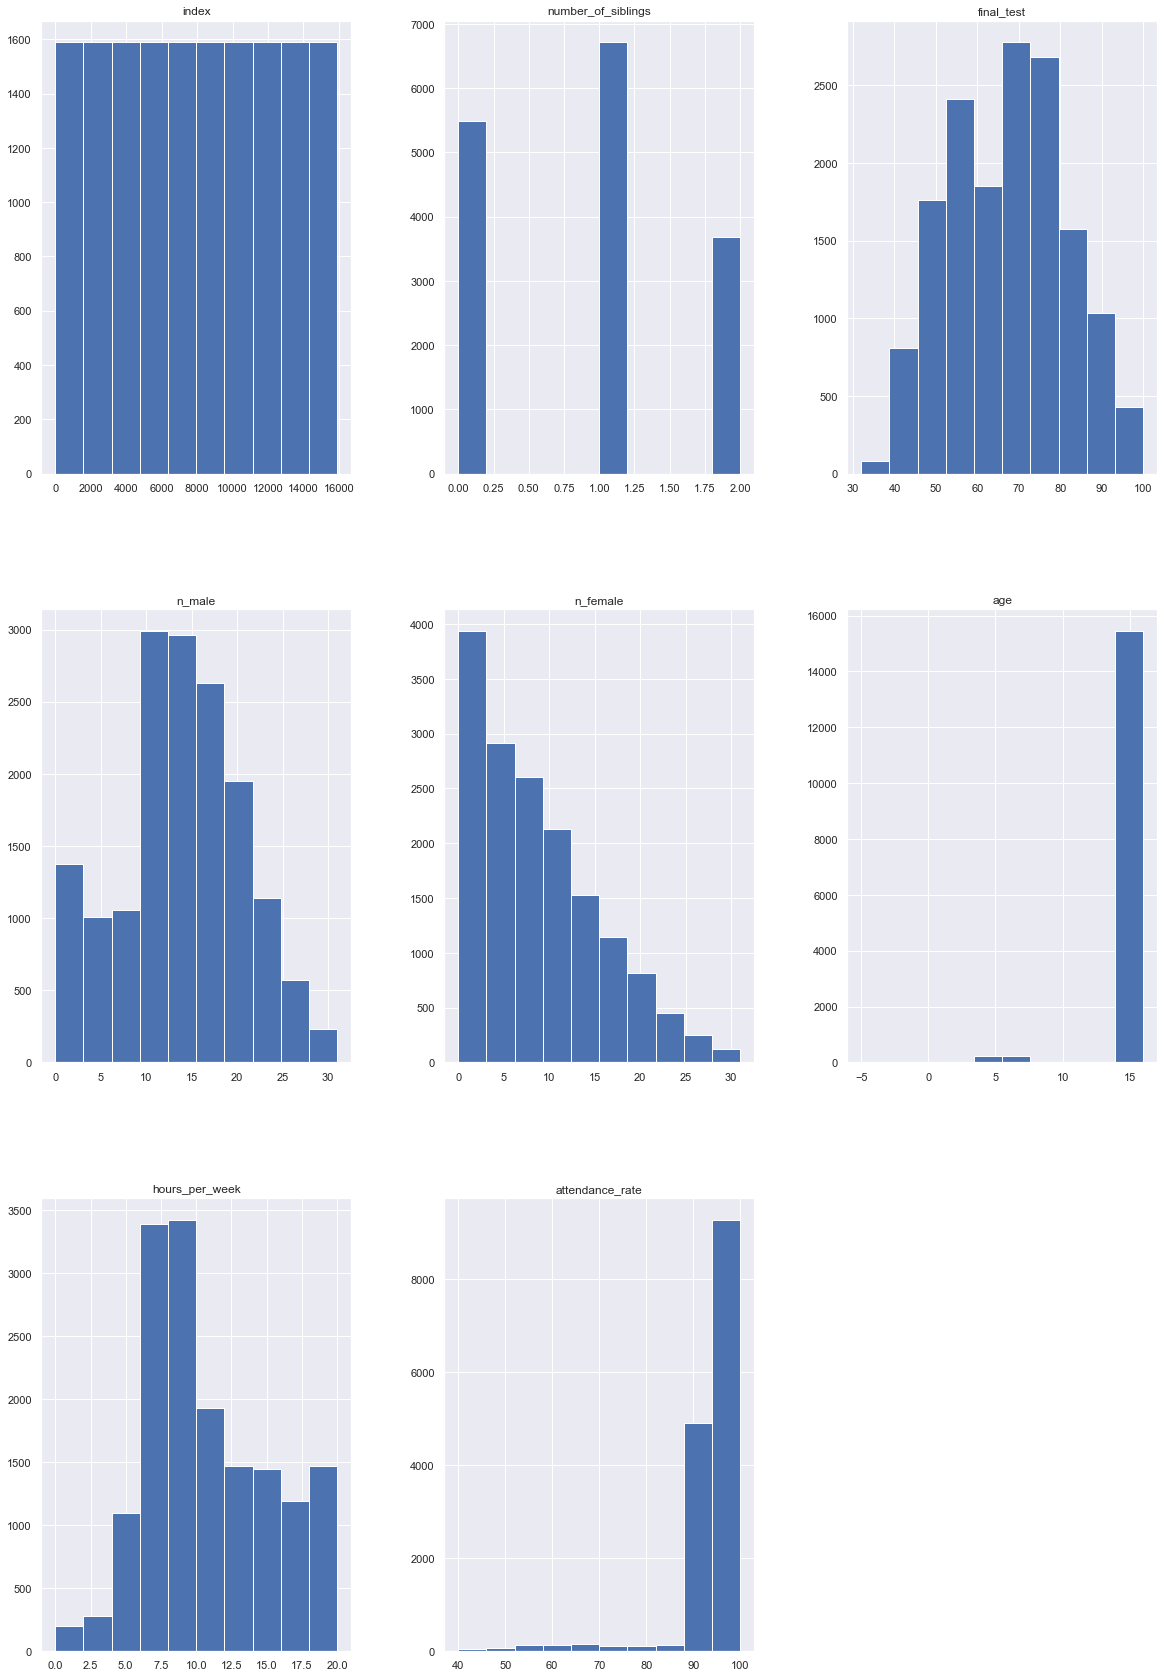

In [7]:
# Implementation: Data Exploration 5
# Using Seaborn with .hist(figsize)
student.hist(figsize=(20,30))

<AxesSubplot:xlabel='age', ylabel='attendance_rate'>

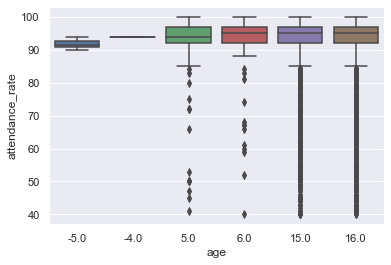

In [8]:
# Implementation: Data Exploration 6
sns.boxplot(x="age", y="attendance_rate", data=student)

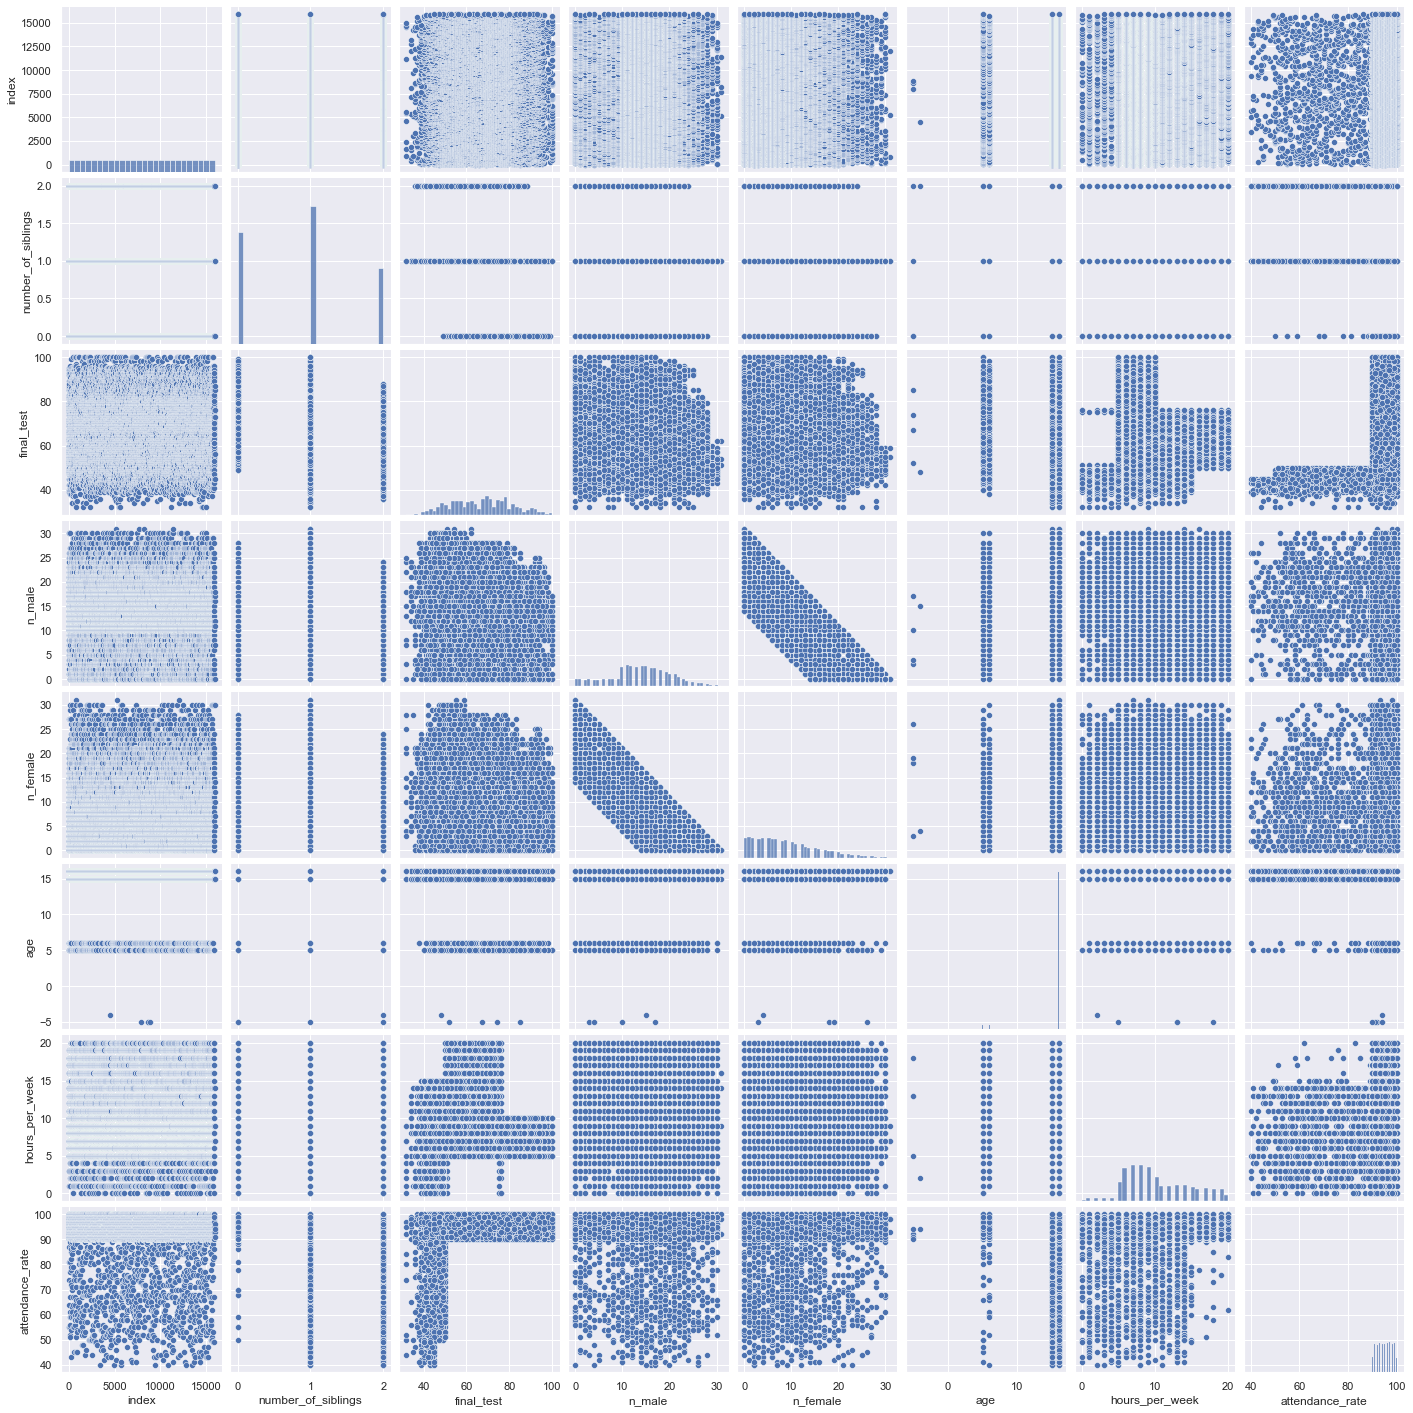

In [9]:
# Implementation: Data Exploration 7
sns.pairplot(student)

In [10]:
# Implementation: Data Exploration 8
student.shape

(15900, 18)

In [11]:
# Implementation: Data Exploration 9
# Count the number of rows before removing the duplicates
student.count()

index                 15900
number_of_siblings    15900
direct_admission      15900
CCA                   15900
learning_style        15900
student_id            15900
gender                15900
tuition               15900
final_test            15405
n_male                15900
n_female              15900
age                   15900
hours_per_week        15900
attendance_rate       15122
sleep_time            15900
wake_time             15900
mode_of_transport     15900
bag_color             15900
dtype: int64

In [12]:
# Implementation: Data Exploration 10
# Rows containing duplicate data
duplicated_student = student[student.duplicated()]
print("No. of duplicated rows: ", duplicated_student.shape)


No. of duplicated rows:  (0, 18)


In [13]:
# Implementation: Data Exploration 11
# Total number of records
df=pd.DataFrame(student)
n_records = len(df.index)

# Number of records where individual's final_test is more than 50.00
n_greater_50 = len(df.loc[df['final_test'] >= 50.00])

# Number of records where individual's final_test is at most 50.00
n_at_most_50 = len(df.loc[df['final_test'] < 50.00])

# Percentage of individuals whose final_test is more than 50.00
greater_percent = (n_at_most_50/(n_greater_50 + n_at_most_50))* 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals obtaining more than 50.00: {}".format(n_greater_50))
print("Individuals obtaining at most 50.00: {}".format(n_at_most_50))
print("Percentage of individuals obtaining less than 50.00: {}%".format(greater_percent))

Total number of records: 15900
Individuals obtaining more than 50.00: 13547
Individuals obtaining at most 50.00: 1858
Percentage of individuals obtaining less than 50.00: 12.061019149626745%


Preparing the Data

Before utilizing data for machine learning algorithms, it requires preprocessing, which involves cleaning, formatting, and restructuring. Thankfully, this dataset has both duplicate data and missing entries, but adjustments are needed for specific features too. This preprocessing significantly enhances the effectiveness and predictive capability of various learning algorithms and it is also a good practise to have hygiene data for data analytics. 

In Implementation: Preparing the Data 1, duplicates are dropped through executing student.drop_duplicates() function. In Implementation: Preparing the Data 2, columns names such as 'index', 'student_id', 'sleep_time', and 'wake_time' are considered redundant, hence dropped using student.drop(<column name>, axis =1). In Implementation: Preparing the Data 3, null data is checked using student.isnull().sum() resulting in the 'final_test' and 'attendance_rate" highlighted as having null data. In Implementation: Preparing the Data 4, these null data from the two mentioned columns are dropped. In Implementation: Preparing the Data 5, numerical data are checked for skewness using skew(student['n_male'], axis=0, bias=True). In Implementation: Preparing the Data 6 the raw data is split into features and target labels. In Implementation: Preparing the Data 7, the skewed features are log-transformed and verified. In Implementation: Preparing the Data 8, Import sklearn.preprocessing.StandardScaler is used to normalise skewed data of 'n_male', 'n_female', 'number_of_siblings', 'age', 'hours_per_week' , and 'attendance_rate'. In Implementation: Preparing the Data 9, non-numerical data is transformed using One-hot encoding of the 'features_log_minmax_transform' data using pandas.get_dummies(). In Implementation: Preparing the Data 10, we separate the data using this "from sklearn.model_selection import train_test_split". In my final Implementation: Preparing the Data 11, Naive Bayes will be  used as our base case to compare, hence I will calculate specificity and accuracy but not precision and recall.

In [14]:
# Implementation: Preparing the Data 1
# To drop duplicates
student = student.drop_duplicates()
student.head()

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow


In [15]:
# Implementation: Preparing the Data 2
# Drop the columns named 'index', 'student_id', 'sleep_time', and 'wake_time'

student = student.drop('index', axis=1)
student = student.drop('student_id', axis=1)
student = student.drop('sleep_time', axis=1)
student = student.drop('wake_time', axis=1)

# Check if "index", "student_id", "sleep_time", and "wake_time" is dropped
student


,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color
0,0,Yes,Sports,Visual,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,private transport,yellow
1,2,No,Sports,Auditory,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,private transport,green
2,0,Yes,None,Visual,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,private transport,white
3,1,No,Clubs,Auditory,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,public transport,yellow
4,0,No,Sports,Auditory,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,public transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,1,No,Clubs,Visual,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,private transport,black
15896,1,Yes,None,Auditory,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,private transport,white
15897,1,Yes,Sports,Auditory,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,walk,red
15898,1,No,Clubs,Visual,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,walk,yellow


In [16]:
# Implementation: Preparing the Data 3
# Find null values, must put sum(), if not it will return Null or otherwise

print(student.isnull().sum())

number_of_siblings      0
direct_admission        0
CCA                     0
learning_style          0
gender                  0
tuition                 0
final_test            495
n_male                  0
n_female                0
age                     0
hours_per_week          0
attendance_rate       778
mode_of_transport       0
bag_color               0
dtype: int64


In [17]:
# Implementation: Preparing the Data 4
# Drop the missing values of 'final_test' and 'attendance_rate'

student = student.dropna()
print(student.count())

# Check any null data
print(student.isnull().sum())

number_of_siblings    14648
direct_admission      14648
CCA                   14648
learning_style        14648
gender                14648
tuition               14648
final_test            14648
n_male                14648
n_female              14648
age                   14648
hours_per_week        14648
attendance_rate       14648
mode_of_transport     14648
bag_color             14648
dtype: int64
number_of_siblings    0
direct_admission      0
CCA                   0
learning_style        0
gender                0
tuition               0
final_test            0
n_male                0
n_female              0
age                   0
hours_per_week        0
attendance_rate       0
mode_of_transport     0
bag_color             0
dtype: int64


Transforming Skewed Continuous Features

In datasets, certain features might exhibit a concentration of values around one number, while also containing a significant number of much larger or smaller values. Sensitivity to such value distributions can impact algorithm performance if the range isn't properly normalized. In our student dataset, seven features—'n_male', 'n_female', 'number_of_siblings', 'final_test', 'age', 'hours_per_week', and 'attendance_rate'—display this pattern.

For features like 'n_males', 'n_female', 'number_of_siblings', 'age', 'hours_per_week', and 'attendance_rate', which have  skewed distributions, it's common practice to apply a logarithmic transformation. This prevents the influence of extreme values on learning algorithms. The logarithmic transformation mitigates the impact of outliers by reducing the value range. However, caution is necessary as the logarithm of 0 is undefined. Therefore, a small positive translation is applied to ensure successful transformation.

In [18]:
# Implementation: Preparing the Data 5 
# To calculate the skewness of the numerical data, and print the result

print("n_males has a skewness of:", skew(student['n_male'], axis=0, bias=True))
print("n_females has a skewness of:", skew(student['n_female'], axis=0, bias=True))
print("number_of_siblings has a skewness of:", skew(student['number_of_siblings'], axis=0, bias=True))
print("final_test has a skewness of:", skew(student['final_test'], axis=0, bias=True))
print("age has a skewness of:", skew(student['age'], axis=0, bias=True))
print("hours_per_week has a skewness of:", skew(student['hours_per_week'], axis=0, bias=True))
print("attendance_rate has a skewness of:", skew(student['attendance_rate'], axis=0, bias=True))

      

n_males has a skewness of: -0.12777754332583688
n_females has a skewness of: 0.7290179913547903
number_of_siblings has a skewness of: 0.1887334454561087
final_test has a skewness of: 0.06007444017916804
age has a skewness of: -5.154062694649903
hours_per_week has a skewness of: 0.4355518553979116
attendance_rate has a skewness of: -3.683134241824767


In [19]:
# Implementation: Preparing the Data 6 
# Split the data into features and target labels and print/#visualise the result to verify

finaltest_raw = student['final_test']
finaltest_raw
features_raw = student.drop('final_test', axis = 1)
features_raw

# Visualize skewed continuous features of original data
#vs.distribution(student.final_test)

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color
0,0,Yes,Sports,Visual,Female,No,14.0,2.0,16.0,10.0,91.0,private transport,yellow
1,2,No,Sports,Auditory,Female,No,4.0,19.0,16.0,7.0,94.0,private transport,green
2,0,Yes,None,Visual,Male,No,14.0,2.0,15.0,8.0,92.0,private transport,white
4,0,No,Sports,Auditory,Male,No,24.0,3.0,16.0,7.0,95.0,public transport,yellow
5,0,No,Arts,Visual,Female,No,9.0,12.0,15.0,11.0,96.0,private transport,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,1,No,Clubs,Visual,Female,No,12.0,14.0,16.0,9.0,96.0,private transport,black
15896,1,Yes,None,Auditory,Male,Yes,17.0,5.0,16.0,7.0,91.0,private transport,white
15897,1,Yes,Sports,Auditory,Female,Yes,7.0,10.0,15.0,7.0,93.0,walk,red
15898,1,No,Clubs,Visual,Male,Yes,18.0,12.0,16.0,3.0,94.0,walk,yellow


In [20]:
# Implementation: Preparing the Data 7
# Log-transform the skewed features, check #and visualise features_log_transformed

skewed = ['n_male', 'n_female', 'number_of_siblings','age', 'hours_per_week', 'attendance_rate']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Checking log data is transformed
features_log_transformed

# Visualize the new log distributions
#vs.distribution(features_log_transformed, transformed = True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color
0,0.000000,Yes,Sports,Visual,Female,No,2.708050,1.098612,2.833213,2.397895,4.521789,private transport,yellow
1,1.098612,No,Sports,Auditory,Female,No,1.609438,2.995732,2.833213,2.079442,4.553877,private transport,green
2,0.000000,Yes,None,Visual,Male,No,2.708050,1.098612,2.772589,2.197225,4.532599,private transport,white
4,0.000000,No,Sports,Auditory,Male,No,3.218876,1.386294,2.833213,2.079442,4.564348,public transport,yellow
5,0.000000,No,Arts,Visual,Female,No,2.302585,2.564949,2.772589,2.484907,4.574711,private transport,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,0.693147,No,Clubs,Visual,Female,No,2.564949,2.708050,2.833213,2.302585,4.574711,private transport,black
15896,0.693147,Yes,None,Auditory,Male,Yes,2.890372,1.791759,2.833213,2.079442,4.521789,private transport,white
15897,0.693147,Yes,Sports,Auditory,Female,Yes,2.079442,2.397895,2.772589,2.079442,4.543295,walk,red
15898,0.693147,No,Clubs,Visual,Male,Yes,2.944439,2.564949,2.833213,1.386294,4.553877,walk,yellow


Normalizing Numerical Features

Incorporating transformations for highly skewed features is essential, and it's equally beneficial to apply scaling to numerical features. Scaling maintains the distribution shape of each feature, including 'n_male', 'n_female', 'number_of_siblings', 'final_test', 'age', 'hours_per_week', and 'attendance_rate' mentioned earlier. Normalization, achieved through scaling, ensures equitable treatment of features during supervised learning. Keep in mind that applying scaling alters the original interpretation of raw data, as illustrated below.

To achieve this, we will utilize the sklearn.preprocessing.MinMaxScaler library.

Skewed data such as 'n_male', n_female', 'age', 'hours_per_week', 'attendance_rate' will be transformed using MinMaxScaler.
The results are then displayed in a table to note the differences.

In [21]:
# Implementation: Preparing the Data 8
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['n_male', 'n_female', 'number_of_siblings', 'age', 'hours_per_week' , 'attendance_rate']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color
0,0.0,Yes,Sports,Visual,Female,No,0.781378,0.316993,1.000000,0.787610,0.896476,private transport,yellow
1,1.0,No,Sports,Auditory,Female,No,0.464386,0.864386,1.000000,0.683011,0.932068,private transport,green
2,0.0,Yes,None,Visual,Male,No,0.781378,0.316993,0.941788,0.721698,0.908467,private transport,white
4,0.0,No,Sports,Auditory,Male,No,0.928771,0.400000,1.000000,0.683011,0.943683,public transport,yellow
5,0.0,No,Arts,Visual,Female,No,0.664386,0.740088,0.941788,0.816189,0.955178,private transport,red


Implementation: Data Preprocessing

As indicated in the data exploration table above, some records contain multiple non-numeric features. Machine learning algorithms commonly demand numeric inputs, necessitating the conversion of non-numeric attributes, often referred to as categorical variables. One prevalent method for this conversion is employing one-hot encoding. This technique generates distinct "dummy" variables for every potential category within each non-numeric attribute.

To implement one-hot encoding on the 'features_log_minmax_transform' dataset, utilize the pandas.get_dummies() function. The results of the total number of features after one-hot encoding are displayed. Expanded features and a table for the first 5 rows after the one-hot encoding are also showned below.

In [22]:
# Implementation: Preparing the Data 9
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()

features_final = pd.get_dummies(student, columns=['direct_admission','CCA','learning_style','gender','tuition','mode_of_transport','bag_color'])

# Encode the 'final_test' data to numerical values
final_test = finaltest_raw.apply(lambda x: 1 if x > 50.0 else 0)
print(final_test)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

# Display features_final after one hot encoding
display(features_final.head(n = 5))

0        1
1        0
2        1
4        1
5        1
        ..
15895    1
15896    1
15897    1
15898    0
15899    1
Name: final_test, Length: 14648, dtype: int64
34 total features after one-hot encoding.
['number_of_siblings', 'final_test', 'n_male', 'n_female', 'age', 'hours_per_week', 'attendance_rate', 'direct_admission_No', 'direct_admission_Yes', 'CCA_ARTS', 'CCA_Arts', 'CCA_CLUBS', 'CCA_Clubs', 'CCA_NONE', 'CCA_None', 'CCA_SPORTS', 'CCA_Sports', 'learning_style_Auditory', 'learning_style_Visual', 'gender_Female', 'gender_Male', 'tuition_N', 'tuition_No', 'tuition_Y', 'tuition_Yes', 'mode_of_transport_private transport', 'mode_of_transport_public transport', 'mode_of_transport_walk', 'bag_color_black', 'bag_color_blue', 'bag_color_green', 'bag_color_red', 'bag_color_white', 'bag_color_yellow']


,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate,direct_admission_No,direct_admission_Yes,CCA_ARTS,...,tuition_Yes,mode_of_transport_private transport,mode_of_transport_public transport,mode_of_transport_walk,bag_color_black,bag_color_blue,bag_color_green,bag_color_red,bag_color_white,bag_color_yellow
0,0,69.0,14.0,2.0,16.0,10.0,91.0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,2,47.0,4.0,19.0,16.0,7.0,94.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,85.0,14.0,2.0,15.0,8.0,92.0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,66.0,24.0,3.0,16.0,7.0,95.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5,0,57.0,9.0,12.0,15.0,11.0,96.0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


Statistical techniques to derive meaningful and relevant insights from the dataset.

Shuffle and Split Data
Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [23]:
# Implementation: Preparing the Data 10
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features_final' and 'final_test' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    final_test, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 11718 samples.
Testing set has 2930 samples.


Model Performance Evaluation

In this section, we will assess the effectiveness of four distinct algorithms in modeling the data. Three of these algorithms will be selected supervised learners, while the fourth will be a naive predictor.

Metrics and the Naive Predictor
Individuals with a final_test score more than 50.00 are typically considered strong students. Therefore, accurately predicting strong students based on a final_test score above 50.00 holds significance. Accuracy appears to be a suitable metric for evaluating model performance in this context. However, it's important to prioritize precision in identifying those below 50.00, as opposed to recalling such cases. To account for both precision and recall, we will employ the Fβ score, with emphasis on precision by setting β=0.5 (F 0.5 score).

Considering the class distribution (performance ≤ 49.99 vs. performance > 49.99), it's evident that most individuals fall into the latter category. This distribution heavily influences accuracy, potentially leading to a naive approach of simply categorizing individuals as performing above 50.00. However, such an approach lacks substantiating information and is considered naive. Nevertheless, understanding this naive prediction aids in establishing a performance benchmark for our models. It's important to note that utilizing this prediction would be futile; classifying all individuals below 50.00 would lead to no identifications.

Note: Recap of Accuracy, Precision, Recall

Accuracy: Ratio of correct predictions to total predictions.
Precision: Proportion of true positives to all positively classified instances.
Recall (Sensitivity): Proportion of true positives to actual positive instances.
For skewed classification like in our case, accuracy alone is insufficient. Precision and recall address this by providing a balanced evaluation. They combine to form the F1 score, a weighted average (harmonic mean) of precision and recall, ranging from 0 to 1, with 1 being optimal. The harmonic mean is chosen due to the nature of ratios.

Naive Predictor Performace

To assess the performance baseline, consider a model that consistently predicts an individual's performance below 50.00. Calculate the accuracy and F-score for this model using the provided code cell, storing the results as 'accuracy' and 'fscore' for later use.

It's important to emphasize that the purpose of creating a naive predictor is to illustrate the performance of a basic model devoid of any sophisticated reasoning. In reality, an ideal base model would stem from prior model outcomes or could be grounded in relevant research. When no benchmark model exists, surpassing random chance represents a starting point for improvement.

In the scenario where our model consistently predicts '1' (indicating performance below 50.00), True Positives (TP) and False NegatPositives (FP) are absent since we make no positives ('0' value) predictions. Specificity aims at measuring what proportion of actual negatives was identified correctly. It does so by dividing the correctly predicted negative samples by the total number of negatives, either correctly predicted as negative or incorrectly predicted as positive (TN, FP). Accuracy is the fraction of predictions our model got right out of all the predictions. This means that we sum the number of predictions correctly predicted as Positive (TP) or correctly predicted as Negative (TN) and divide it by all types of predictions, both correct (TP, TN) and incorrect (FP, FN). Since TP and FP are both zeros, we are left with TN / TN + FN for accuracy metric calculation. The F1 score is a less known performance metric, indicating the harmonic mean of Precision and Recall. The highest value of an F1 Score is 1, indicating perfect Precision and Recall, and the lowest possible value is 0 if either the Precision or the Recall is zero.Since our Precision and Recall is zero, we will ignore calculating F1 score.

Our resulting accuracy is 0.1355 and Specificity score is 1 for our Naive base case. 

In [24]:
# Implementation: Preparing the Data 11
# Calculate specificity and accuracy but not precision and recall
'''
TP = 0 # No predicted positives in the naive case
FP = 0 # No predicted positives in the naive case

TN = np.sum(final_test) # Counting the ones as this is the naive case. Note that 'final_test' is the 'finaltest_raw' data 
encoded to numerical values done in the data preprocessing step.
FN = final_test.count() - TN # Specific to the naive case
'''

TP = 0
FP = 0

TN = np.sum(final_test == 0)
FN = final_test.count() - TN

# Accuracy is the fraction of predictions our model got right out of all the predictions. 
# This means that we sum the number of predictions correctly predicted as Positive (TP) or correctly predicted as Negative (TN) and divide it by all types of predictions, both correct (TP, TN) and incorrect (FP, FN).TP / (TP + FN)
recall = 0 # TP / ( TP + FN)
precision = 0 #(TP)/(TP + FP) 
specificity = TN / (FP + TN)
accuracy = ( TP + TN) / ( TP + TN + FP + FN) # TP and FP are both zeros, we are left with TN / TN + FN

# Ignore calculating F-score using the formula above for beta = 0.5 and correct values for precision and recall.
#fscore = (1+0.5**2) * (precision * recall)/ (((0.5**2) * precision) + recall)

# Print the results 

print("Naive Predictor: [Specificity score: {:.4f}, Accuracy score: {:.4f}]".format(specificity, accuracy))

Naive Predictor: [Specificity score: 1.0000, Accuracy score: 0.1352]
